In [69]:
import pandas as pd
import torch
import torch.nn as nn
from sklearn.preprocessing import StandardScaler
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim


df=pd.read_csv('./data/051910.csv',index_col=0).reset_index(drop=True)
# df=pd.read_csv('./data/215600.csv',index_col=0).reset_index(drop=True)
code_name=pd.read_csv('./data/code_name.csv')
train=df[['open','high','low','volume']]
target=df[['close']]

In [70]:
def preprocessing(data):
    
    scaler= StandardScaler()
    data=scaler.fit_transform(data)
    data=np.array(data)
    
    return data,scaler
    
def split_data(data):
    
    prop=len(data)//5
    val=data[:prop]
    test=data[prop+1:2*prop]
    train=data[2*prop:]
    
    return np.array(train),np.array(val),np.array(test)

def make_seq(data,window_size):
    seq_data=[]
    for i in range(data.shape[0]-window_size):
        L=data[i:i+window_size]
        seq_data.append(L)
    return seq_data

In [71]:
train_data_normalized,scaler_train = preprocessing(train.iloc[:-1])
target_data_normalized ,scaler_test= preprocessing(target.iloc[1:])

train_seq=make_seq(train_data_normalized,window_size=5)
target_seq=make_seq(target_data_normalized,window_size=5)

x_train,x_val,x_test=split_data(train_seq)
y_train,y_val,y_test=split_data(target_seq)

### LSTM을 이용한 예측

In [72]:
class stock_net(nn.Module):
    def __init__(self, embedding_dim, hidden_dim):
        
        super(stock_net, self).__init__()
        self.lstm = nn.GRU(embedding_dim, hidden_dim)
        self.h_o=nn.Linear(hidden_dim,1)
        self.relu = nn.ReLU()
        
    def forward(self,x):
        
        x=self.lstm(x)
        x=self.relu(self.h_o(x[0]))
        
        return x

In [73]:
emb_dim=x_train.shape[2] # feature size

In [99]:
haha_net=stock_net(emb_dim,10)
criterion = nn.MSELoss()
# Optimizer를 생성합니다.
optimizer = optim.SGD(haha_net.parameters(), lr=0.001)

In [101]:
Loss=[]
epoch=3
for y in range(epoch):
    for i in range(x_train.shape[0]):

        optimizer.zero_grad()
        output=haha_net(torch.FloatTensor(x_train[i]).view(5,-1,4))
        loss = criterion(output, torch.FloatTensor(y_train[i]))
        loss.backward()
        optimizer.step()  
        if i%100==0:
            Loss.append(loss.item())
            print('epoch/step',y,i,':',loss.item())

epoch/step 0 0 : 0.73527592420578
epoch/step 0 100 : 0.6580135822296143
epoch/step 0 200 : 0.11120356619358063
epoch/step 0 300 : 0.0425124391913414
epoch/step 0 400 : 0.309242308139801
epoch/step 0 500 : 0.820602536201477
epoch/step 0 600 : 2.060643434524536
epoch/step 0 700 : 4.00133752822876
epoch/step 0 800 : 0.8929893970489502
epoch/step 0 900 : 0.3733534812927246
epoch/step 0 1000 : 0.771000862121582
epoch/step 0 1100 : 0.389660120010376
epoch/step 0 1200 : 0.44034454226493835
epoch/step 0 1300 : 0.48643946647644043
epoch/step 0 1400 : 0.23746170103549957
epoch/step 0 1500 : 0.0028712924104183912
epoch/step 0 1600 : 0.05671307072043419
epoch/step 0 1700 : 0.055972225964069366
epoch/step 0 1800 : 0.8484135866165161
epoch/step 0 1900 : 0.2735618054866791
epoch/step 0 2000 : 0.1372261345386505
epoch/step 0 2100 : 0.5049330592155457
epoch/step 0 2200 : 1.6576428413391113
epoch/step 0 2300 : 3.111349582672119
epoch/step 0 2400 : 1.1151467561721802
epoch/step 0 2500 : 1.049207806587219

In [102]:
Prediction=[]
for i in x_test:
    prediction=haha_net(torch.FloatTensor(i).view(5,-1,4))
    Prediction.append(prediction.view(-1).detach().numpy()[-1])  #many to many 라 마지막 종가만 추가

In [103]:
Prediction=np.array(Prediction).reshape(-1)
print(Prediction.shape)

(921,)


In [104]:
prediction=scaler_test.inverse_transform(Prediction.reshape(-1,1))

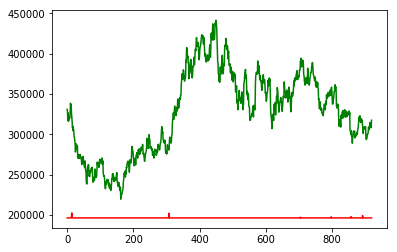

In [105]:
import matplotlib.pyplot as plt

plt.plot(prediction,'r')
plt.plot(target.iloc[-y_test.shape[0]:].reset_index(drop=True),'g')

In [106]:
prediction

array([[196287.28],
       [196287.28],
       [196287.28],
       [196287.28],
       [196287.28],
       [196287.28],
       [196287.28],
       [196287.28],
       [196287.28],
       [196287.28],
       [196287.28],
       [196287.28],
       [196287.28],
       [198360.36],
       [202470.08],
       [196287.28],
       [196287.28],
       [196287.28],
       [196287.28],
       [196287.28],
       [196287.28],
       [196287.28],
       [196287.28],
       [196287.28],
       [196287.28],
       [196287.28],
       [196287.28],
       [196287.28],
       [196287.28],
       [196287.28],
       [196287.28],
       [196287.28],
       [196287.28],
       [196287.28],
       [196287.28],
       [196287.28],
       [196287.28],
       [196287.28],
       [196287.28],
       [196287.28],
       [196287.28],
       [196287.28],
       [196287.28],
       [196287.28],
       [196287.28],
       [196287.28],
       [196287.28],
       [196287.28],
       [196287.28],
       [196287.28],
